In [1]:
import geopandas as gpd
import os
import json
import pandas as pd
from shapely.geometry import Point, Polygon
import warnings
warnings.filterwarnings("ignore")

In [2]:
home = "H:/work/Xianyu/psyduck/Urban-Spatial-Data-Analysis_python/notebook/BaiduMapPOIcollection_ipynb/data/xianPOI_36"
poi_xian_path = [os.path.join(home, p) for p in os.listdir(home)]

In [3]:
# read to Dataframe
for p in poi_xian_path:
    with open(p, "r") as f:
        poi_xian_ = pd.DataFrame(json.load(f))

    if p == poi_xian_path[0]:
        poi_xian = poi_xian_
    else:
        poi_xian = pd.concat([poi_xian, poi_xian_])

In [4]:
# Dataframe to gpd.Dataframe
poi_xian["geometry"] = poi_xian.apply(lambda row: Point(row.location["lng"], row.location["lat"]), axis=1)
poi_xian_gpd = gpd.GeoDataFrame(poi_xian, crs="EPSG:32749")

<AxesSubplot:>

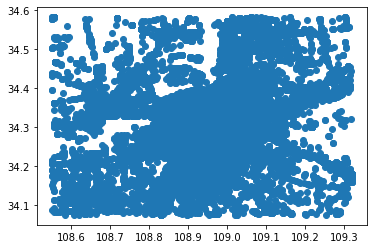

In [5]:
# plot
poi_xian_gpd.plot()

                       name                               location  \
3369                运输公司家属院  {'lat': 34.295894, 'lng': 108.997637}   
3288              万国金色家园-8栋  {'lat': 34.296113, 'lng': 108.994784}   
3286              万国金色家园-6栋  {'lat': 34.296217, 'lng': 108.995826}   
4347                精修电动摩托车   {'lat': 34.29625, 'lng': 108.999791}   
5137             陕西共恒物资有限公司   {'lat': 34.296269, 'lng': 108.99987}   
...                     ...                                    ...   
2840     再出发 养发 脱发 白发(莲湖路店)  {'lat': 34.276039, 'lng': 108.942074}   
2486  农村商业银行24小时自助银行(莲湖路分社)   {'lat': 34.276152, 'lng': 108.94323}   
2650         百草堂足疗(中心莲湖旗舰店)  {'lat': 34.276174, 'lng': 108.943662}   
3017   7天连锁酒店(西安钟鼓楼北大街地铁站店)  {'lat': 34.276209, 'lng': 108.944164}   
921          西安雄杰广告文化传播有限公司  {'lat': 34.277064, 'lng': 108.944095}   

                                    address province city area  \
3369                        陕西省西安市新城区含元路49号      陕西省  西安市  新城区   
3288                       

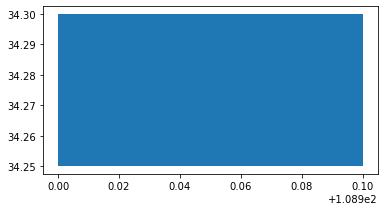

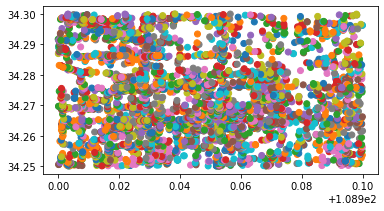

In [6]:
# extract points contained in interesting area
''' box: left-bottom (108.90, 34.25) left-top(108.90, 34.30) right-top (109.00, 34.30) right-bottom(109.00, 34.25) '''
coord = ((108.90, 34.25), (108.90, 34.30), (109.00, 34.30), (109.00, 34.25))
rect_interesting = pd.DataFrame(columns=["geometry"])
rect_interesting.loc[0, "geometry"] = Polygon(coord)
rect_interesting = gpd.GeoDataFrame(rect_interesting, crs="EPSG:32749")
rect_interesting.plot()

poi_interest = gpd.clip(poi_xian_gpd, rect_interesting)
poi_interest.plot(column="name")
print(poi_interest)

In [7]:
height_shp_path = "H:/work/Xianyu/psyduck/python_code_archi_la_design_method_study/notebook/data/xianBuildingHeight/xian_Project.shp"
height_shp = gpd.read_file(height_shp_path)

<AxesSubplot:>

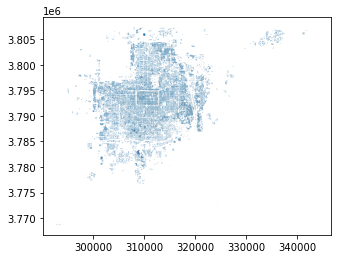

In [8]:
height_shp.plot()

In [9]:
print(height_shp.crs)

epsg:32649


In [10]:
height_shp_proj = height_shp.to_crs(epsg=4326)
height_shp_interest = height_shp_proj.overlay(rect_interesting, how="intersection")

In [11]:
print(height_shp_interest)

       Id  Floor                                           geometry
0       0      2  POLYGON ((108.90000 34.29611, 108.90013 34.296...
1       0      2  POLYGON ((108.90000 34.29551, 108.90011 34.295...
2       0      2  POLYGON ((108.90000 34.29524, 108.90013 34.295...
3       0      2  POLYGON ((108.90000 34.29580, 108.90011 34.295...
4       0     14  POLYGON ((108.90003 34.29658, 108.90013 34.296...
...    ..    ...                                                ...
26752   0      1  POLYGON ((108.99871 34.25055, 108.99895 34.250...
26753   0      1  POLYGON ((108.99895 34.25023, 108.99895 34.250...
26754   0      1  POLYGON ((108.99871 34.25167, 108.99924 34.251...
26755   0      1  POLYGON ((108.99952 34.25176, 108.99952 34.251...
26756   0     14  POLYGON ((108.99874 34.25000, 108.99874 34.250...

[26757 rows x 3 columns]


<AxesSubplot:>

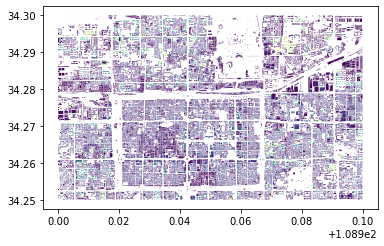

In [12]:
height_shp_interest.plot(column="Floor")

In [13]:
import numpy as np
poi_xian_lat = [s["lat"] for s in poi_xian.location]
poi_xian_lng = [s["lng"] for s in poi_xian.location]
poi_coordinates = np.vstack((poi_xian_lat, poi_xian_lng))
poi_coordinates.shape

(2, 88814)

In [ ]:
from scipy import stats
poi_coordi_kernel = stats.gaussian_kde(poi_coordinates)

In [15]:
poi_xian["poi_kde"] = poi_coordi_kernel(poi_coordinates)

In [25]:
poi_xian

,name,location,address,province,city,area,street_id,telephone,detail,uid,detail_info,geometry,poi_kde
0,户县兴伦美食广场,"{'lat': 34.113672, 'lng': 108.61473}",东街兴伦购物广场2楼(近户县大十字),陕西省,西安市,鄠邑区,d53e36ff9983316aa11de99b,"(029)62783211,15929907028",1,d53e36ff9983316aa11de99b,"{'tag': '美食;中餐厅', 'navi_location': {'lng': 108...",POINT (108.615 34.114),11.838807
1,户县机场老马家烧烤,"{'lat': 34.157196, 'lng': 108.597683}",陕西省西安市鄠邑区百丰村,陕西省,西安市,鄠邑区,NaN,13992801336,1,db7c222e3212dd885a3ac8e9,"{'tag': '美食;其他', 'type': 'cater', 'detail_url'...",POINT (108.598 34.157),1.008381
2,户县印象,"{'lat': 34.106033, 'lng': 108.630919}",鄠邑区人民路南段御苑新城8号商铺,陕西省,西安市,鄠邑区,88639ad04e1172e0df1e522a,(029)84881111,1,88639ad04e1172e0df1e522a,"{'tag': '美食;中餐厅', 'type': 'cater', 'detail_url...",POINT (108.631 34.106),9.721422
3,长虹饭店(渼陂东路),"{'lat': 34.12213, 'lng': 108.615176}",陕西省西安市鄠邑区娄敬路139号,陕西省,西安市,鄠邑区,24292c38b28468d0118824eb,(029)84827788,1,24292c38b28468d0118824eb,"{'tag': '美食;中餐厅', 'navi_location': {'lng': 108...",POINT (108.615 34.122),11.084176
4,聚鑫缘食府,"{'lat': 34.115677, 'lng': 108.659891}",沣京开发区兴园路2号居正大厦一层,陕西省,西安市,鄠邑区,NaN,"(029)89022633,13572582848",1,4a3efb073648f51a343a71ee,"{'tag': '美食;中餐厅', 'type': 'cater', 'detail_url...",POINT (108.660 34.116),5.357693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,星艺庆典文化演出公司,"{'lat': 34.37524, 'lng': 109.221699}",东大街102附近,陕西省,西安市,临潼区,d3de3acbe8e84bcab75f1e11,13700285896,1,d3de3acbe8e84bcab75f1e11,"{'tag': '文化传媒;其他', 'type': 'enterprise', 'deta...",POINT (109.222 34.375),13.409924
1148,北关社区老年人文化活动站,"{'lat': 34.393768, 'lng': 109.219586}",人民北路7号,陕西省,西安市,临潼区,b48fe35c6d9cbf45c17da25f,NaN,1,b48fe35c6d9cbf45c17da25f,"{'tag': '文化传媒;文化宫', 'type': 'life', 'detail_ur...",POINT (109.220 34.394),11.689179
1149,北田镇尖角村文化室,"{'lat': 34.461974, 'lng': 109.198865}",北田镇尖角村尖角小学附近,陕西省,西安市,临潼区,NaN,NaN,1,08560e702fa5709ac8213dcd,"{'tag': '文化传媒;文化宫', 'type': 'life', 'detail_ur...",POINT (109.199 34.462),0.531258
1150,临潼区新丰街道办事处文化站,"{'lat': 34.425913, 'lng': 109.281201}",鸿门路17号附近,陕西省,西安市,临潼区,c51c1b48a1f723043904b179,NaN,1,c51c1b48a1f723043904b179,"{'tag': '文化传媒;文化宫', 'type': 'life', 'detail_ur...",POINT (109.281 34.426),2.472129


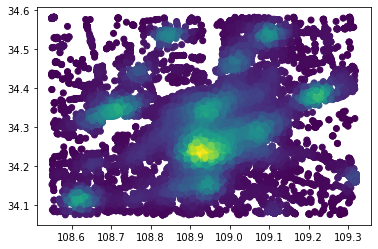

In [26]:
import matplotlib.pyplot as plt
plt.scatter(poi_xian_lng, poi_xian_lat, c=poi_xian.poi_kde.values)

In [36]:
from sklearn.cluster import KMeans
X = height_shp.Floor.values
X = X.reshape(-1, 1)
k = 3

kmeans=KMeans(n_clusters=k)
kmeans=kmeans.fit(X)
labels=kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [37]:
centroids

array([[ 6.60541823],
       [22.80437424],
       [ 2.27286902]])

In [38]:
print("预测(7)的簇为：%d"%kmeans.predict(np.array([[7]]))[0])

预测(7)的簇为：0


In [21]:
height_shp["reclass"] = kmeans.predict(X)

In [22]:
print(height_shp)

        Id  Floor                                           geometry  reclass
0        0      4  POLYGON ((293016.564 3794569.532, 293037.913 3...        2
1        0      6  POLYGON ((292754.318 3768746.174, 292852.300 3...        0
2        0      6  POLYGON ((292751.345 3768700.867, 292795.878 3...        0
3        0      8  POLYGON ((292790.495 3768723.697, 292797.429 3...        0
4        0      2  POLYGON ((292883.117 3768744.393, 292898.968 3...        2
...     ..    ...                                                ...      ...
145042   0      2  POLYGON ((342011.614 3806750.400, 342018.505 3...        2
145043   0      3  POLYGON ((343937.888 3780860.574, 343982.325 3...        2
145044   0      6  POLYGON ((343936.902 3780860.593, 343937.644 3...        0
145045   0      6  POLYGON ((344001.083 3780863.325, 344001.825 3...        0
145046   0      1  POLYGON ((344006.876 3780915.400, 344008.654 3...        2

[145047 rows x 4 columns]


<AxesSubplot:>

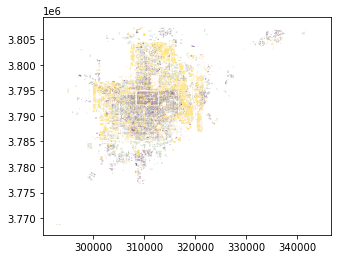

In [23]:
height_shp.plot(column="reclass")

In [24]:
# 分析1： 所有美食POI的核密度估计
# 分析2： 所有文化传媒POI的核密度估计
# 分析3： 所有公司企业POI的核密度估计
# 分析4： 高度数据Floor的频率分析
# 分析5： 高度数据建筑面积的频率分析

In [73]:
poi_xian_gpd["tag"] = poi_xian_gpd.apply(lambda row: row.detail_info.get("tag"), axis=1)

In [78]:
poi_xian_gpd_withoutNone = poi_xian_gpd[pd.notnull(poi_xian_gpd["tag"])]
poi_xian_gpd_withoutNone

,name,location,address,province,city,area,street_id,telephone,detail,uid,detail_info,geometry,poi_kde,tag
0,户县兴伦美食广场,"{'lat': 34.113672, 'lng': 108.61473}",东街兴伦购物广场2楼(近户县大十字),陕西省,西安市,鄠邑区,d53e36ff9983316aa11de99b,"(029)62783211,15929907028",1,d53e36ff9983316aa11de99b,"{'tag': '美食;中餐厅', 'navi_location': {'lng': 108...",POINT (108.615 34.114),11.838807,美食;中餐厅
1,户县机场老马家烧烤,"{'lat': 34.157196, 'lng': 108.597683}",陕西省西安市鄠邑区百丰村,陕西省,西安市,鄠邑区,NaN,13992801336,1,db7c222e3212dd885a3ac8e9,"{'tag': '美食;其他', 'type': 'cater', 'detail_url'...",POINT (108.598 34.157),1.008381,美食;其他
2,户县印象,"{'lat': 34.106033, 'lng': 108.630919}",鄠邑区人民路南段御苑新城8号商铺,陕西省,西安市,鄠邑区,88639ad04e1172e0df1e522a,(029)84881111,1,88639ad04e1172e0df1e522a,"{'tag': '美食;中餐厅', 'type': 'cater', 'detail_url...",POINT (108.631 34.106),9.721422,美食;中餐厅
3,长虹饭店(渼陂东路),"{'lat': 34.12213, 'lng': 108.615176}",陕西省西安市鄠邑区娄敬路139号,陕西省,西安市,鄠邑区,24292c38b28468d0118824eb,(029)84827788,1,24292c38b28468d0118824eb,"{'tag': '美食;中餐厅', 'navi_location': {'lng': 108...",POINT (108.615 34.122),11.084176,美食;中餐厅
4,聚鑫缘食府,"{'lat': 34.115677, 'lng': 108.659891}",沣京开发区兴园路2号居正大厦一层,陕西省,西安市,鄠邑区,NaN,"(029)89022633,13572582848",1,4a3efb073648f51a343a71ee,"{'tag': '美食;中餐厅', 'type': 'cater', 'detail_url...",POINT (108.660 34.116),5.357693,美食;中餐厅
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,星艺庆典文化演出公司,"{'lat': 34.37524, 'lng': 109.221699}",东大街102附近,陕西省,西安市,临潼区,d3de3acbe8e84bcab75f1e11,13700285896,1,d3de3acbe8e84bcab75f1e11,"{'tag': '文化传媒;其他', 'type': 'enterprise', 'deta...",POINT (109.222 34.375),13.409924,文化传媒;其他
1148,北关社区老年人文化活动站,"{'lat': 34.393768, 'lng': 109.219586}",人民北路7号,陕西省,西安市,临潼区,b48fe35c6d9cbf45c17da25f,NaN,1,b48fe35c6d9cbf45c17da25f,"{'tag': '文化传媒;文化宫', 'type': 'life', 'detail_ur...",POINT (109.220 34.394),11.689179,文化传媒;文化宫
1149,北田镇尖角村文化室,"{'lat': 34.461974, 'lng': 109.198865}",北田镇尖角村尖角小学附近,陕西省,西安市,临潼区,NaN,NaN,1,08560e702fa5709ac8213dcd,"{'tag': '文化传媒;文化宫', 'type': 'life', 'detail_ur...",POINT (109.199 34.462),0.531258,文化传媒;文化宫
1150,临潼区新丰街道办事处文化站,"{'lat': 34.425913, 'lng': 109.281201}",鸿门路17号附近,陕西省,西安市,临潼区,c51c1b48a1f723043904b179,NaN,1,c51c1b48a1f723043904b179,"{'tag': '文化传媒;文化宫', 'type': 'life', 'detail_ur...",POINT (109.281 34.426),2.472129,文化传媒;文化宫


In [84]:
poi_xian_gpd_withoutNone.tag

0         美食;中餐厅
1          美食;其他
2         美食;中餐厅
3         美食;中餐厅
4         美食;中餐厅
          ...   
1147     文化传媒;其他
1148    文化传媒;文化宫
1149    文化传媒;文化宫
1150    文化传媒;文化宫
1151     公司企业;公司
Name: tag, Length: 88797, dtype: object

all data len = 88797
poi_analysis_gpd len = 1573


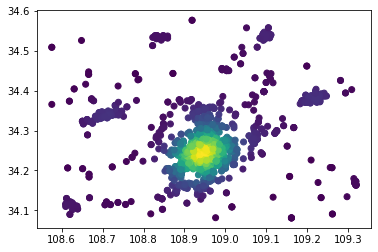

In [97]:
# 分析2： 所有文化传媒POI的核密度估计
index = poi_xian_gpd_withoutNone.apply(lambda row: row.tag.startswith("文化传媒"), axis=1)
poi_analysis_gpd = poi_xian_gpd_withoutNone[index]
print(f"all data len = {len(poi_xian_gpd_withoutNone)}\npoi_analysis_gpd len = {len(poi_analysis_gpd)}")
from scipy import stats
poi_xian_lat = [s["lat"] for s in poi_analysis_gpd.location]
poi_xian_lng = [s["lng"] for s in poi_analysis_gpd.location]
poi_coordinates = np.vstack((poi_xian_lat, poi_xian_lng))

poi_coordi_kernel = stats.gaussian_kde(poi_coordinates)
poi_analysis_gpd["poi_kde"] = poi_coordi_kernel(poi_coordinates)
plt.scatter(poi_xian_lng, poi_xian_lat, c=poi_analysis_gpd.poi_kde.values)